# Проектная работа по модулю “Математика и статистика в Python”

<pre>
ФИО: Никифоров Владимир
</pre>

## Загрузить файл hr.csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import scipy.stats as sts
import scipy.stats.mstats as mstats
from scipy.stats import pearsonr

from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
df = pd.read_csv('../data/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
# рассмотрим данные: размер датасета
print(df.shape)
# информацию по датасету - типы и наличие NULL в столбцах
print(df.info())

(14999, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


Сразу видим, что пустых значений в столбцах нет - все стобцы заполнены 14999 непустыми значениями, что также можно проверить следующим образом:

In [8]:
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


## Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [9]:
# бОльшую часть статистик мы можем получить простейшей стандартной операцией описания датасета
# А именно: среднее (mean), медиану (50%), мин/макс, сред. отклонение (std)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
# Посчитаем моду
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# альтернативный вариант через mstats.mode подойдет для числовых переменных
df_mode = pd.DataFrame(data=list(df.describe().columns), columns=['column_name'])
df_mode['mode'] = list(mstats.mode(df[list(df.describe().columns)], axis=0).mode.data[0])
df_mode

,column_name,mode
0,satisfaction_level,0.10
1,last_evaluation,0.55
2,number_project,4.00
3,average_montly_hours,135.00
4,time_spend_company,3.00
5,Work_accident,0.00
6,left,0.00
7,promotion_last_5years,0.00


## Рассчитать и визуализировать корреляционную матрицу для переменных.

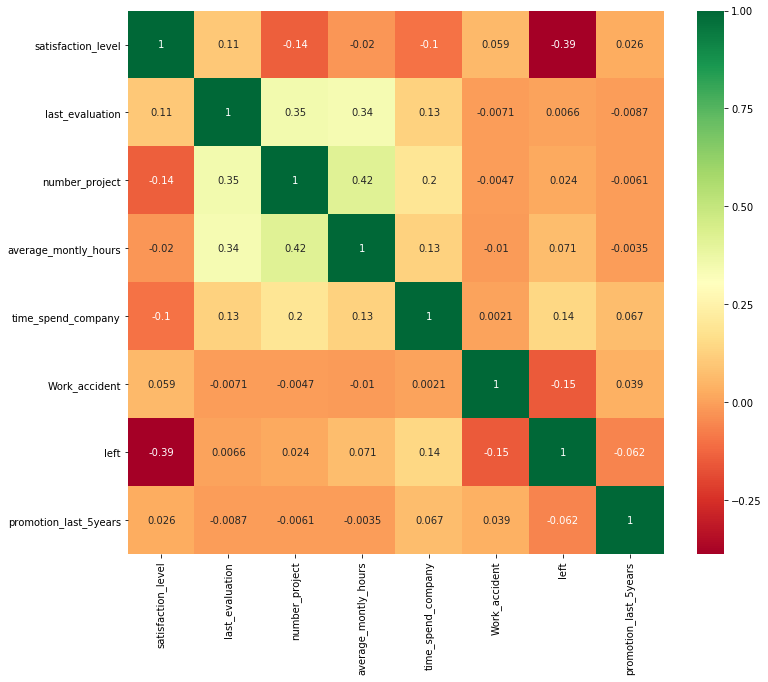

In [12]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn");

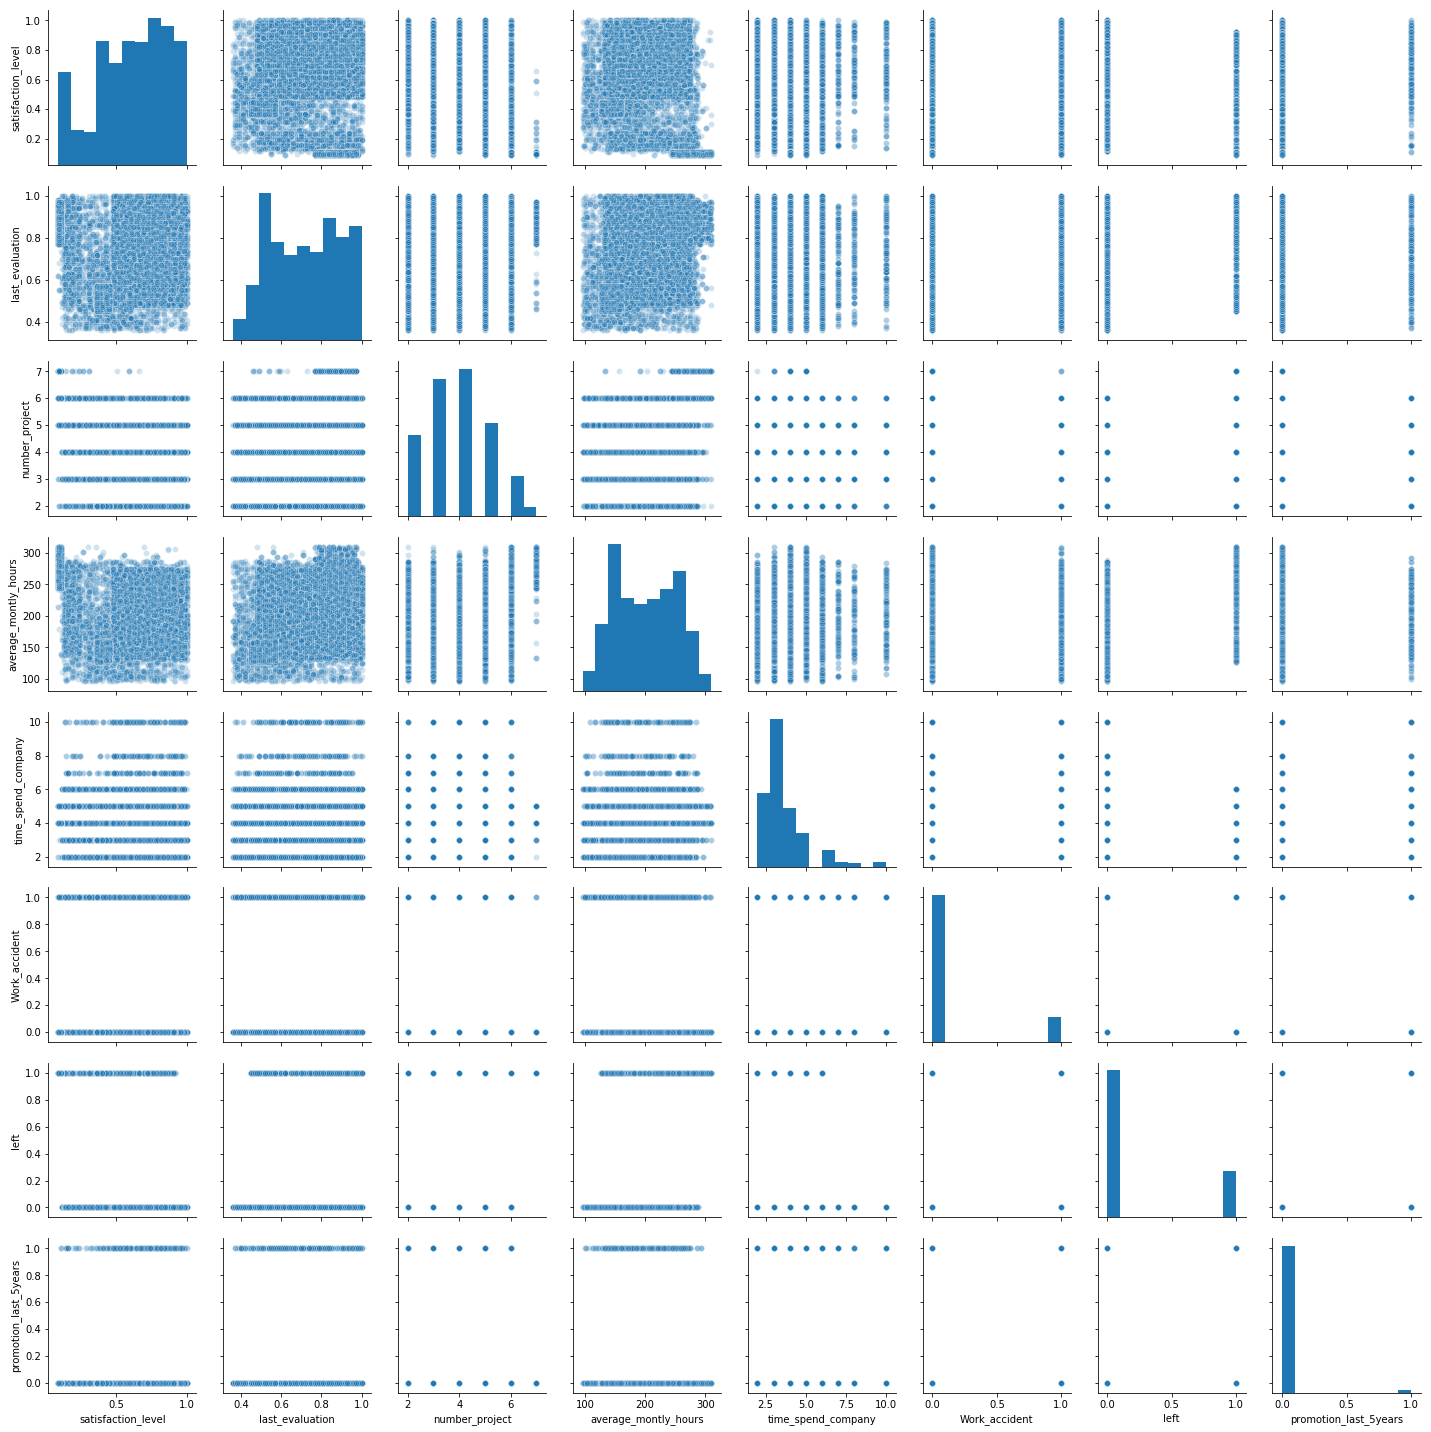

In [13]:
sns.pairplot(data=df,plot_kws={'alpha':0.2},palette='hot');

## Визуализировать несколько взаимосвязей между переменными

## С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

## Рассчитать сколько работников работает в каждом департаменте.

## Показать распределение сотрудников по зарплатам.

## Показать распределение сотрудников по зарплатам совместно с департаментами.

## Сколько сотрудников покинули компанию.

## Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

## Загрузить результат (в формате .ipynbноутбука) в репозиторий. Разместить ссылку на репозиторийв лкна сайте